You can compare the similarity of two distributions (here two normal distributions for a test and a reference group) utilizing the Kullback-Leibler Divergence (KLD). Higher KLD values indicate more divergence. Provide only feature matrix ``X`` and its respective group ``labels`` to the ``comp_kld`` function:

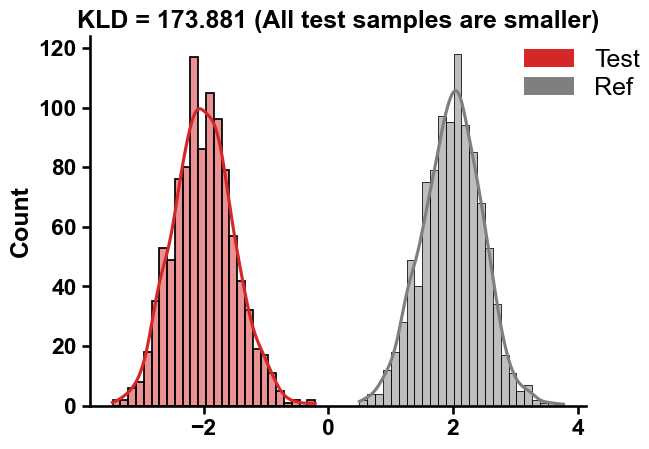

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import aaanalysis as aa

# Generate random data for two groups
group_test = np.random.normal(-2, 0.5, 1000)  # Mean = -2, Std = 0.5, 1000 samples
group_ref = np.random.normal(2, 0.5, 1000)  # Mean = 2, Std = 0.5, 1000 samples

# Combine data into a single dataset and reshape it
X = np.hstack([group_test, group_ref]).reshape(-1, 1)  # Reshape to 2D array
labels = np.array([1]*1000 + [0]*1000)
kld_score = round(aa.comp_kld(X, labels)[0], 3)

# Plot
aa.plot_settings()
sns.histplot(group_test, color="tab:red", kde=True, label='Test group', alpha=0.5)
sns.histplot(group_ref, color="tab:gray", kde=True, label='Reference group', alpha=0.5)
plt.title(f"KLD = {kld_score} (All test samples are smaller)")
aa.plot_legend(dict_color=dict(Test="tab:red", Ref="tab:gray"), ncol=1, x=0.85, y=1)
sns.despine()
plt.show()

The greater the overlap between both distributions, the closer the ``kld_score`` is to 0:

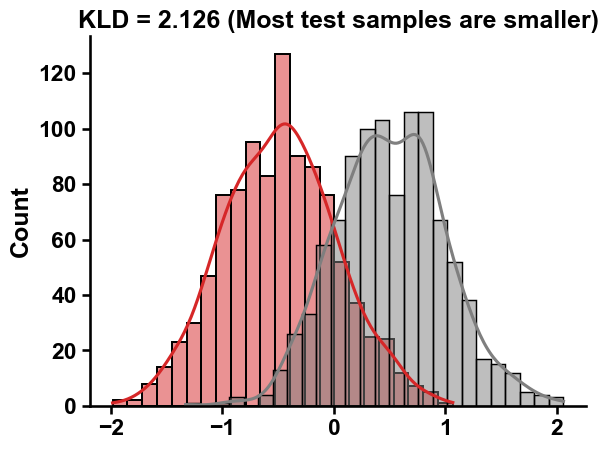

In [2]:
group_test = np.random.normal(-0.5, 0.5, 1000)
group_ref = np.random.normal(0.5, 0.5, 1000)
X = np.hstack([group_test, group_ref]).reshape(-1, 1)  # Reshape to 2D array
labels = np.array([1]*1000 + [0]*1000)
kld_score = round(aa.comp_kld(X, labels)[0], 3)

# Plot
aa.plot_settings()
sns.histplot(group_test, color="tab:red", kde=True, label='Test group', alpha=0.5)
sns.histplot(group_ref, color="tab:gray", kde=True, label='Reference group', alpha=0.5)
plt.title(f"KLD = {kld_score} (Most test samples are smaller)")
sns.despine()
plt.show()

A ``kld_score`` of 0 indicates a perfect overlap:

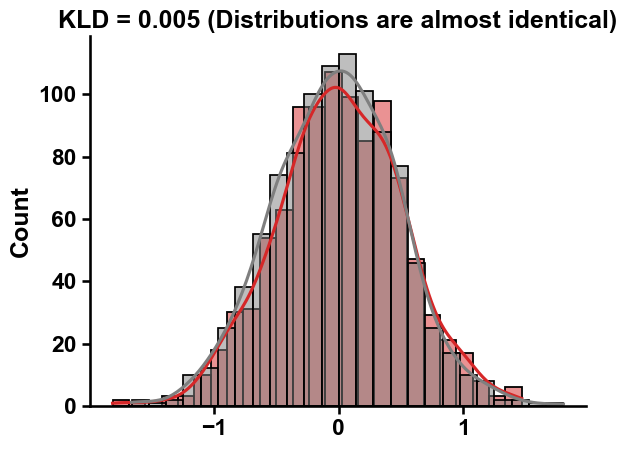

In [3]:
group_test = np.random.normal(0, 0.5, 1000) 
group_ref = np.random.normal(0, 0.5, 1000) 
X = np.hstack([group_test, group_ref]).reshape(-1, 1)  # Reshape to 2D array
labels = np.array([1]*1000 + [0]*1000)
kld_score = round(aa.comp_kld(X, labels)[0], 3)

# Plot
aa.plot_settings()
sns.histplot(group_test, color="tab:red", kde=True, label='Test group', alpha=0.5)
sns.histplot(group_ref, color="tab:gray", kde=True, label='Reference group', alpha=0.5)
plt.title(f"KLD = {kld_score} (Distributions are almost identical)")
sns.despine()
plt.show()

The ``kld_score`` reaches its maximum when all values from the test group (with the higher integer value) exceed those of the reference group, and similarly, when all values from the reference group surpass those of the test group:

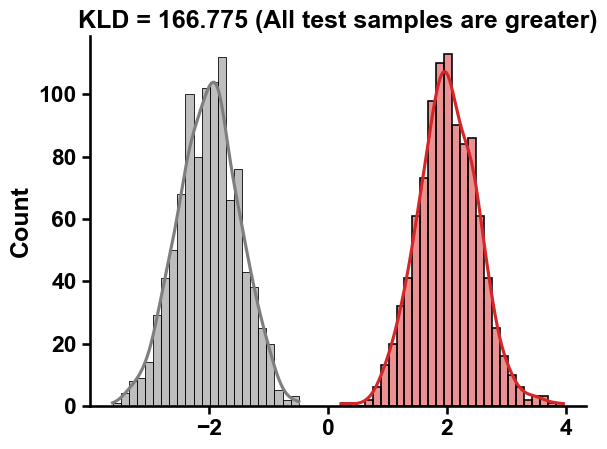

In [4]:
group_test = np.random.normal(2, 0.5, 1000) 
group_ref = np.random.normal(-2, 0.5, 1000) 
X = np.hstack([group_test, group_ref]).reshape(-1, 1)  # Reshape to 2D array
labels = np.array([1]*1000 + [0]*1000)
kld_score = round(aa.comp_kld(X, labels)[0], 3)

# Plot
aa.plot_settings()
sns.histplot(group_test, color="tab:red", kde=True, label='Test group', alpha=0.5)
sns.histplot(group_ref, color="tab:gray", kde=True, label='Reference group', alpha=0.5)
plt.title(f"KLD = {kld_score} (All test samples are greater)")
sns.despine()
plt.show()